# 2. Exploratory Data Analysis

2.1 Load cleaned dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
train_data = pd.read_csv('/Users/mehmetkursatgonc/Documents/DSS Folders/Thesis Folders/Kürşat Thesis/Thesis_Data_and_Coding_Files_2nd_Submission/GitHub_Repository/train_data.csv')
validation_data = pd.read_csv('/Users/mehmetkursatgonc/Documents/DSS Folders/Thesis Folders/Kürşat Thesis/Thesis_Data_and_Coding_Files_2nd_Submission/GitHub_Repository/validation_data.csv')
test_data = pd.read_csv('/Users/mehmetkursatgonc/Documents/DSS Folders/Thesis Folders/Kürşat Thesis/Thesis_Data_and_Coding_Files_2nd_Submission/GitHub_Repository/test_data.csv')

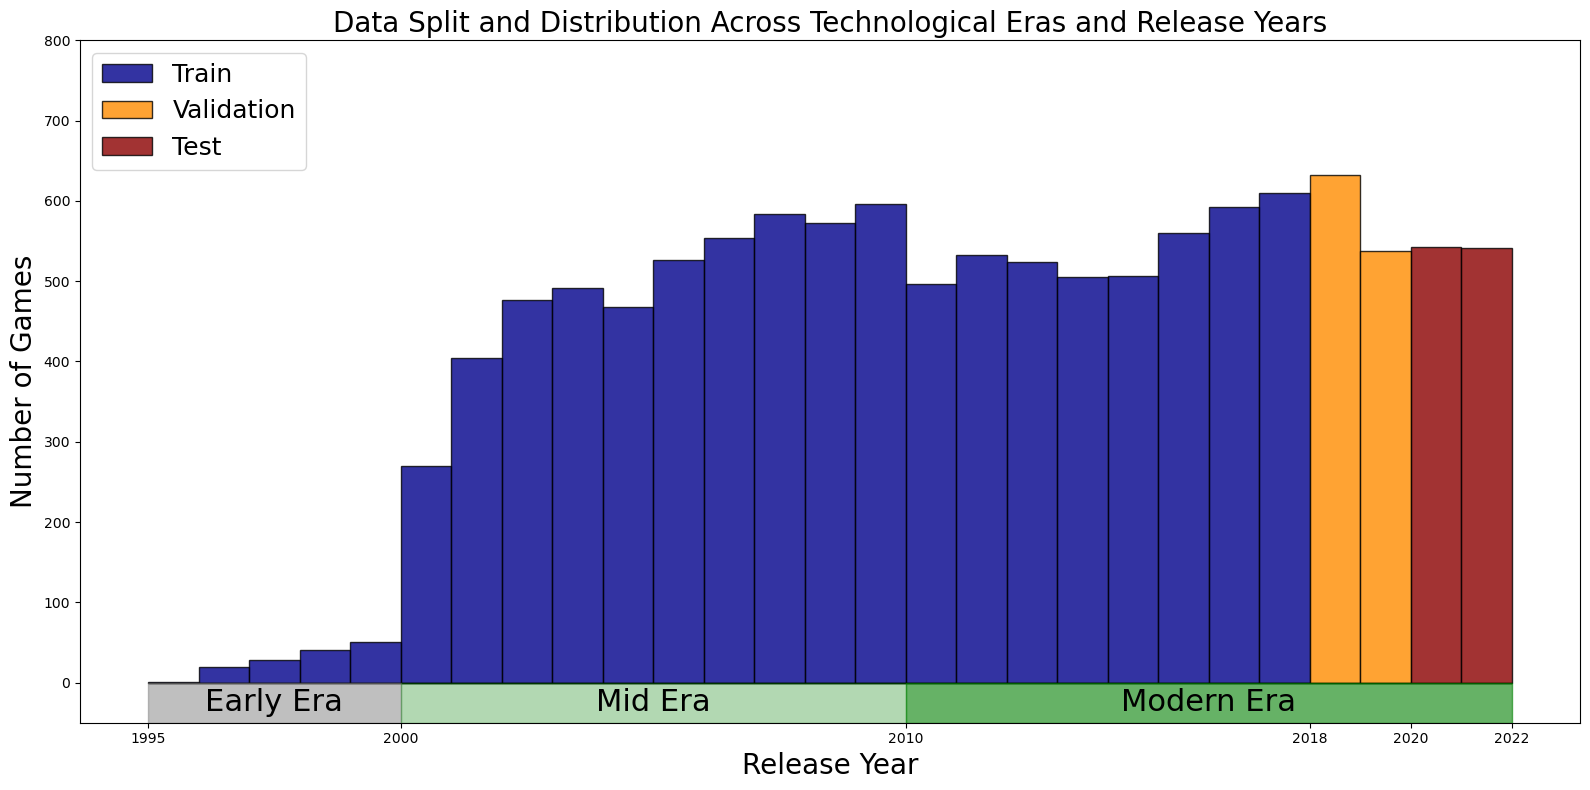

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

# Combine datasets with labels
train_data['Set'] = 'Train'
validation_data['Set'] = 'Validation'
test_data['Set'] = 'Test'
combined_data = pd.concat([train_data, validation_data, test_data], ignore_index=True)

# Plot data distribution by year
plt.figure(figsize=(16, 8))

# Histogram for each set
bins = range(combined_data['release_year'].min(), combined_data['release_year'].max() + 1, 1)
plt.hist(train_data['release_year'], bins=bins, alpha=0.8, label='Train', color='darkblue', edgecolor='black')
plt.hist(validation_data['release_year'], bins=bins, alpha=0.8, label='Validation', color='darkorange', edgecolor='black')
plt.hist(test_data['release_year'], bins=bins, alpha=0.8, label='Test', color='darkred', edgecolor='black')

# Dye under the X-axis area for each era (remove labels for eras)
plt.fill_betweenx([-50, 0], 1995, 2000, color='gray', alpha=0.5)   # Early Era
plt.fill_betweenx([-50, 0], 2000, 2010, color='green', alpha=0.3)  # Mid Era
plt.fill_betweenx([-50, 0], 2010, 2022, color='green', alpha=0.6)  # Modern Era

# Annotate eras under the zero line
plt.text(1997.5, -25, 'Early Era', fontsize=22, color='black', ha='center', va='center')
plt.text(2005, -25, 'Mid Era', fontsize=22, color='black', ha='center', va='center')
plt.text(2016, -25, 'Modern Era', fontsize=22, color='black', ha='center', va='center')

# Labels and legend
plt.title('Data Split and Distribution Across Technological Eras and Release Years', fontsize=20)
plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Number of Games', fontsize=20)
plt.xticks([1995, 2000, 2010, 2018, 2020, 2022])
plt.ylim(-50, 800)

# Legend (exclude eras)
plt.legend(['Train', 'Validation', 'Test'], loc='upper left', fontsize=18)

plt.tight_layout()
plt.show()

2.2 Basic info

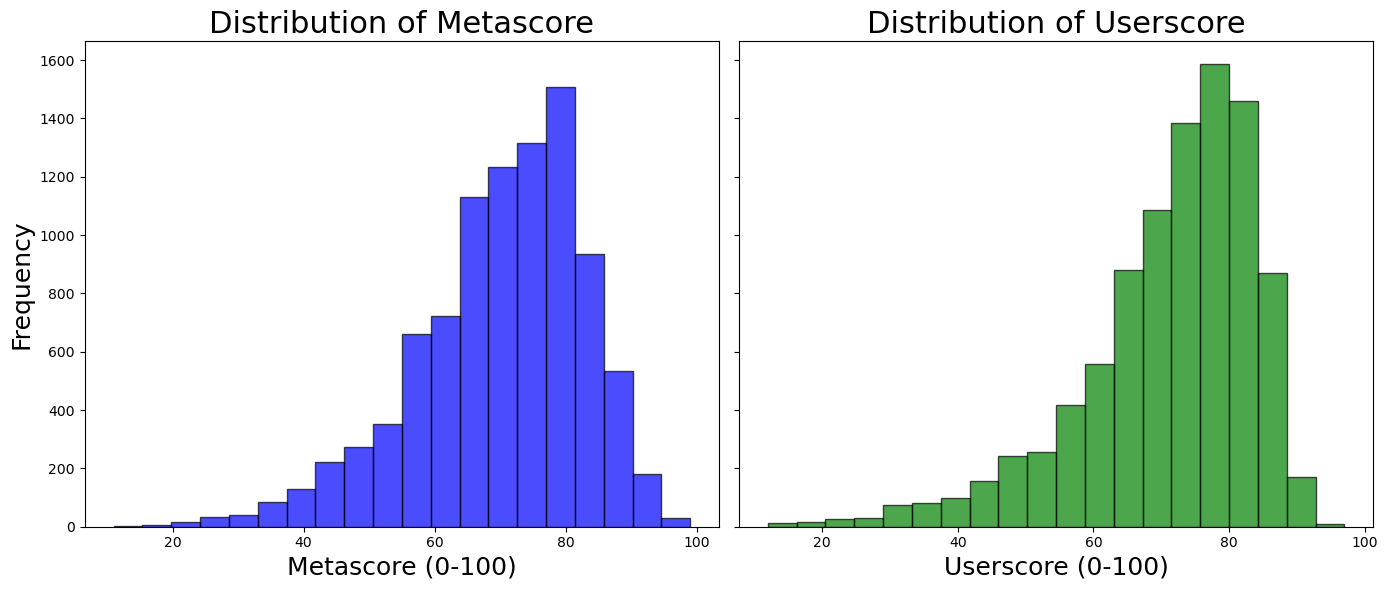

In [3]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Bar graph for Metascore
axes[0].hist(train_data['metascore'], bins=20, color='blue', alpha=0.7, edgecolor='black')
axes[0].set_title('Distribution of Metascore', fontsize=22)
axes[0].set_xlabel('Metascore (0-100)', fontsize=18)
axes[0].set_ylabel('Frequency', fontsize=18)

# Bar graph for Userscore
axes[1].hist(train_data['userscore'], bins=20, color='green', alpha=0.7, edgecolor='black')
axes[1].set_title('Distribution of Userscore', fontsize=22)
axes[1].set_xlabel('Userscore (0-100)', fontsize=18)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

2.4 Numerical feature summary

In [4]:
# Descriptive statistics for numerical columns
print("Numerical Feature Summary:")
print(train_data.describe())
print(test_data.describe())
print(validation_data.describe())

Numerical Feature Summary:
         metascore    userscore  release_year
count  9411.000000  9411.000000   9411.000000
mean     69.946946    71.098669   2008.864201
std      12.857424    12.869901      5.160057
min      11.000000    12.000000   1995.000000
25%      62.578947    65.000000   2005.000000
50%      72.000000    74.000000   2009.000000
75%      79.000000    80.000000   2013.000000
max      99.000000    97.000000   2017.000000
         metascore    userscore  release_year
count  1084.000000  1084.000000   1084.000000
mean     73.494493    67.353115   2020.583948
std       9.461325    14.437591      0.642709
min      29.000000     3.306272   2020.000000
25%      68.638735    61.000000   2020.000000
50%      75.000000    70.762500   2020.000000
75%      80.000000    77.000000   2021.000000
max      96.000000    95.000000   2022.000000
         metascore    userscore  release_year
count  1170.000000  1170.000000   1170.000000
mean     71.807636    66.478267   2018.459829
std    

In [5]:
import pandas as pd


# Define a function to find mismatched features between sets
def find_mismatched_features(feature, train, val, test):
    train_unique = set(train[feature].dropna().unique())
    val_unique = set(val[feature].dropna().unique())
    test_unique = set(test[feature].dropna().unique())

    # Features in test but not in train or val
    test_not_in_train_val = test_unique - (train_unique | val_unique)
    # Features in validation but not in train
    val_not_in_train = val_unique - train_unique
    # Features in train but not in test or val
    train_not_in_test_val = train_unique - (val_unique | test_unique)

    return {
        "test_not_in_train_val": test_not_in_train_val,
        "val_not_in_train": val_not_in_train,
        "train_not_in_test_val": train_not_in_test_val,
    }

# Specify the features you want to check (e.g., 'platforms', 'genre', etc.)
features_to_check = ['platforms', 'genre', 'developer', 'esrb_rating']

# Check mismatched features for each specified feature
for feature in features_to_check:
    print(f"Feature: {feature}")
    mismatched = find_mismatched_features(feature, train_data, validation_data, test_data)
    for key, value in mismatched.items():
        print(f"  {key}: {value}")
    print("-" * 50)

Feature: platforms
  test_not_in_train_val: {'PlayStation 5, Switch, Xbox Series X', 'PlayStation 5, Xbox Series X', 'PlayStation 4, Wii', 'PlayStation 5', 'PC, PlayStation 5, Switch', 'PC, PlayStation 4, Xbox One, Xbox Series X', 'PlayStation 4, PlayStation 5, Switch', 'PC, PlayStation 4, PlayStation 5, Xbox One, Xbox Series X', 'PC, PSP, Switch, Xbox One', 'PlayStation 5, Xbox 360', 'Xbox Series X', 'PC, PlayStation 5', 'PlayStation 4, PlayStation 5, Xbox Series X', 'PC, PlayStation 2, PlayStation 5, Xbox One, Xbox Series X', 'PC, Switch, Xbox One, Xbox Series X', 'PC, PlayStation 4, PlayStation 5', 'PC, PlayStation 5, Switch, Wii U, Xbox Series X', 'PC, Xbox One, Xbox Series X', 'PC, PlayStation 4, PlayStation 5, Switch, Xbox Series X', 'PC, PlayStation 4, PlayStation 5, Switch', 'PlayStation 4, PlayStation 5', 'PC, PlayStation 4, Wii U, Xbox 360', 'PC, PlayStation 4, Switch, Xbox Series X', 'PC, PlayStation 4, PlayStation 5, Switch, Xbox One', 'PC, Xbox Series X', 'PlayStation 3, P

In [167]:
# Find developers in the test data that are not in the training data
test_not_in_train = set(test_data['developer']) - set(train_data['developer'])

# Display the developers that are in the test set but not in the training set
print("Developers in Test Set but not in Training Set:")
print(test_not_in_train)

Developers in Test Set but not in Training Set:
{'eXtend', 'Moonshine Studios', 'Skrollcat Studios', 'Demagog Studio', 'ONE MORE LEVEL', 'Mr. Nutz Studio', 'Monster Games Inc., 704Games, Sperasoft', 'Splash Damage, Splash Damage, The Coalition', 'Prideful Sloth', 'Psychodev', 'Genius Sonority Inc., The Pokemon Company', 'VEWO Interactive Inc.', 'Smilegate', 'LKA', 'V1 Interactive', 'Phobia Game Studio', 'Kaizen Game Works', 'Saibot Studios', 'X Plus', 'Visual Dart, Next Stage', 'Pixpil', 'Mercury Steam, Ubisoft Montreal', 'Airship Syndicate Entertainment', 'Techland, Techland, Warner Bros. Interactive Entertainment', 'FYQD Personal Studio', 'Stormind Games', 'All in! Games', 'Draw Distance', 'BonusXP', 'Joon, Pol, Muutsch, Char & Torfi', 'Chibig', 'Moonsprout Games', 'Alter Games', 'SOFTSTAR Entertainment', 'Good Gate Media', 'SNK Corporation', 'Headbang Club', 'ManaVoid Entertainment Inc.', 'Beethoven & Dinosaur', 'Exiin', 'Midgar Studio', 'E-Line Media', 'Grimorio of Games', 'Westone

2.5 Frequency analysis for categorical features


Frequency Analysis for genre:
genre
2D, Action, Platformer                           343
Action RPG, Role-Playing                         307
Action, General                                  226
3D, Action, Platformer                           192
Action, Arcade, First-Person, Sci-Fi, Shooter    166
3D, Action, Fighting                             159
Adventure, General                               148
Console-style RPG, Role-Playing                  112
General, Miscellaneous, Puzzle                   108
Action Adventure, Horror, Survival               105
Name: count, dtype: int64

Frequency Analysis for platforms:
platforms
PC                         2246
PlayStation 2               606
Xbox 360                    537
DS                          429
PlayStation 4               394
Wii                         339
PlayStation 3, Xbox 360     306
3DS                         304
PlayStation 3               294
PSP                         283
Name: count, dtype: int64

Frequency Analy

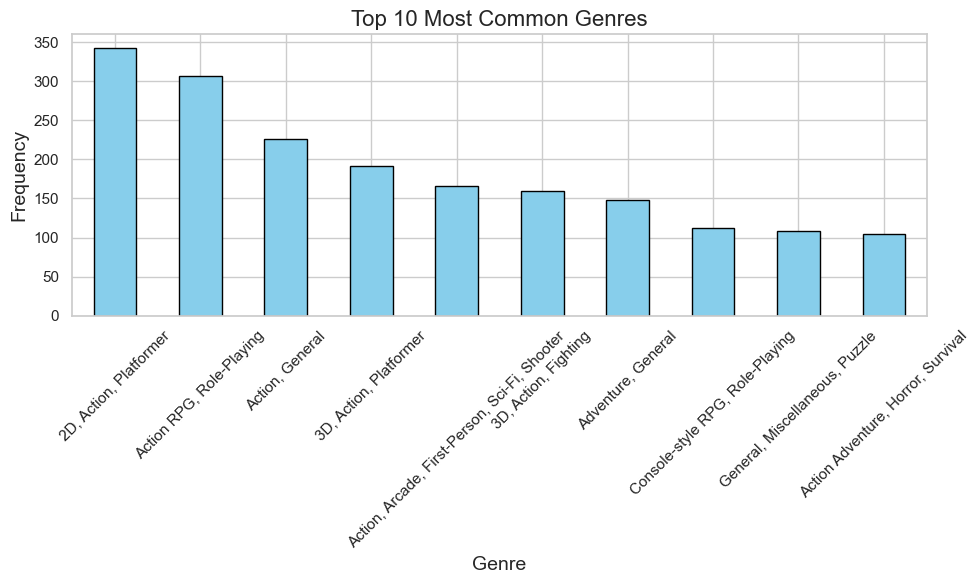

In [168]:
# Frequency analysis for categorical features
categorical_columns = ['genre', 'platforms', 'developer', 'esrb_rating']

for col in categorical_columns:
    print(f"\nFrequency Analysis for {col}:")
    print(train_data[col].value_counts().head(10))  # Top 10 categories

# Visualize most common genres
top_genres = train_data['genre'].value_counts().head(10)
top_genres.plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')
plt.title("Top 10 Most Common Genres", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

2.6 Metascore and Userscore Distribution

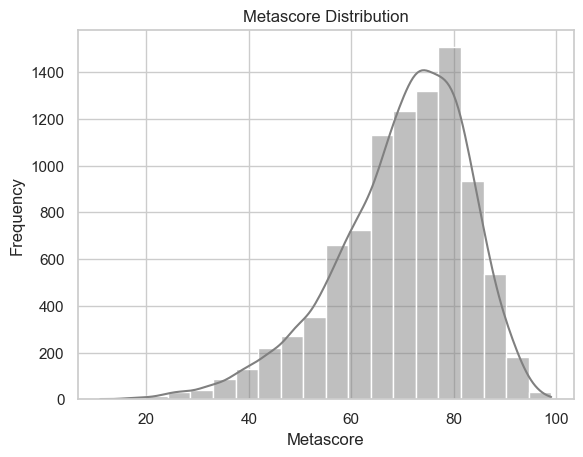

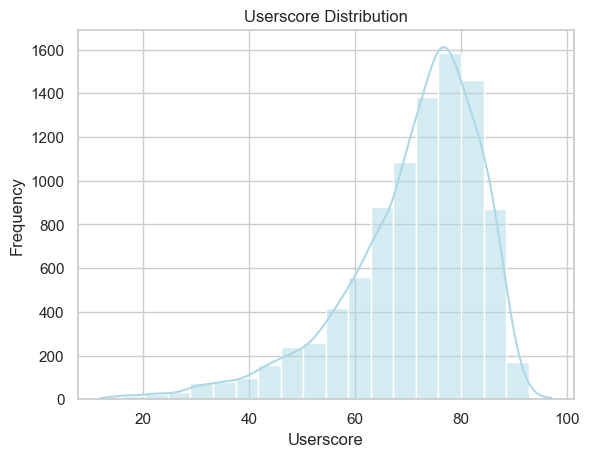

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train_data['metascore'], kde=True, bins=20, color='gray')
plt.title("Metascore Distribution")
plt.xlabel("Metascore")
plt.ylabel("Frequency")
plt.show()

sns.histplot(train_data['userscore'], kde=True, bins=20, color='lightblue')
plt.title("Userscore Distribution")
plt.xlabel("Userscore")
plt.ylabel("Frequency")
plt.show()

2.6 Average Scores by Release Year and Decade

/var/folders/d1/myh4s_bj49bglpp9bnck2fvr0000gn/T/ipykernel_68567/673785757.py:41: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  avg_scores_by_era['metascore'][idx] + 1,


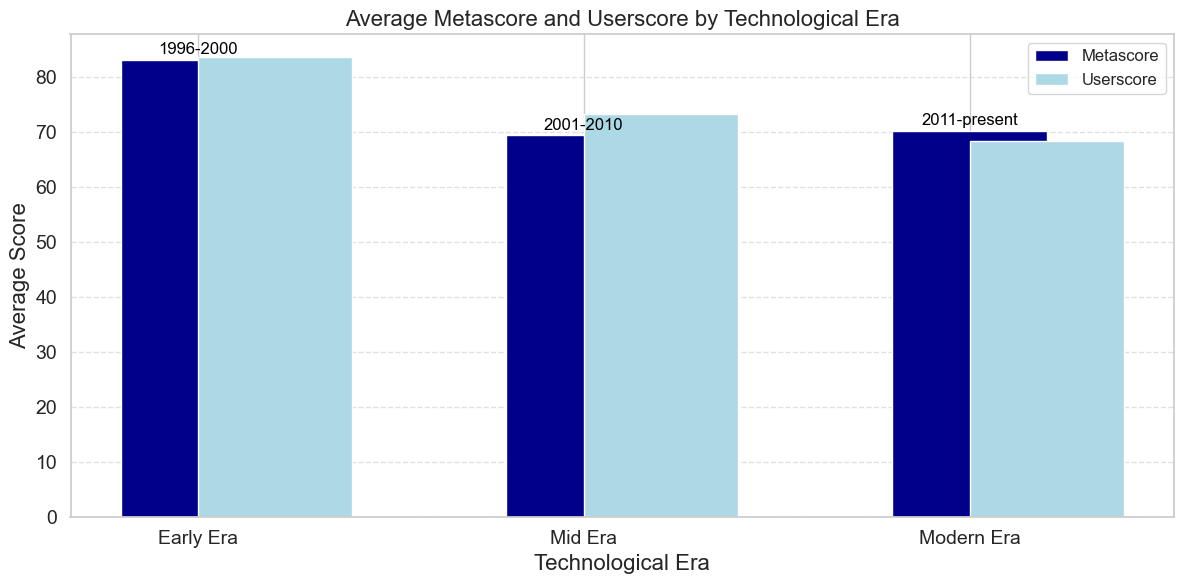

In [170]:
import matplotlib.pyplot as plt

# Define the mapping of technological eras to their years
era_years = {
    'Early Era': '1996-2000',
    'Mid Era': '2001-2010',
    'Modern Era': '2011-present'
}

# Group data by technological era and calculate mean scores
avg_scores_by_era = train_data.groupby('technological_era')[['metascore', 'userscore']].mean()

# Plot the data as bar plots
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bar plot for metascore
bar_width = 0.4
ax.bar(
    avg_scores_by_era.index,
    avg_scores_by_era['metascore'],
    width=bar_width,
    label='Metascore',
    align='center',
    color='darkblue'
)

# Plot bar plot for userscore
ax.bar(
    avg_scores_by_era.index,
    avg_scores_by_era['userscore'],
    width=bar_width,
    label='Userscore',
    align='edge',
    color='lightblue'
)

# Add annotations for the years
for idx, era in enumerate(avg_scores_by_era.index):
    ax.text(
        idx, 
        avg_scores_by_era['metascore'][idx] + 1, 
        era_years[era], 
        ha='center', 
        fontsize=12, 
        color='black'
    )

# Add title and labels with custom font sizes
ax.set_title("Average Metascore and Userscore by Technological Era", fontsize=16)
ax.set_xlabel("Technological Era", fontsize=16)
ax.set_ylabel("Average Score", fontsize=16)

# Add legend
ax.legend(fontsize=12)

# Customize tick label font sizes
ax.tick_params(axis='both', labelsize=14)

# Add a grid
ax.grid(axis='y', linestyle='--', alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()

2.7 Numerical Columns Analysis

In [171]:
# Extract only numerical columns
numerical_features = train_data.select_dtypes(include=['float64', 'int64'])
print("Numerical Features:")
print(numerical_features.head())

Numerical Features:
   metascore  userscore  release_year
0       86.0       86.0          1995
1       90.0       88.0          1996
2       80.0       83.0          1996
3       92.0       83.0          1996
4       74.0       69.0          1996


* Correlation matrix

Correlation Matrix:
              metascore  userscore  release_year
metascore      1.000000   0.595923     -0.020227
userscore      0.595923   1.000000     -0.234208
release_year  -0.020227  -0.234208      1.000000


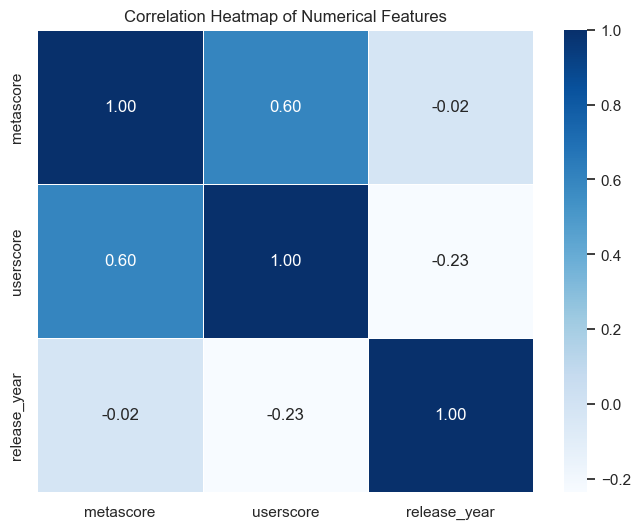

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
correlation_matrix = numerical_features.corr()
print("Correlation Matrix:")
print(correlation_matrix)

# Heatmap visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

2.8 Pairwise Scatterplot for both targets

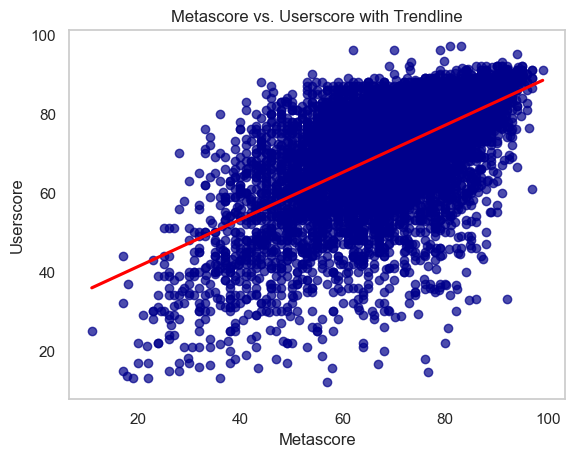

In [173]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with a trendline
sns.regplot(
    x='metascore', 
    y='userscore', 
    data=train_data, 
    scatter_kws={'alpha': 0.7, 'color': 'darkblue'},
    line_kws={'color': 'red'}, 
    ci=None 
)

# Add title and labels
plt.title("Metascore vs. Userscore with Trendline")
plt.xlabel("Metascore")
plt.ylabel("Userscore")
plt.grid()

# Display the plot
plt.show()

In [174]:
# Analyze unique values for categorical features
for col in ['genre', 'platforms', 'developer', 'esrb_rating', 'technological_era']:
    print(f"{col}: {train_data[col].nunique()} unique values")
    print(train_data[col].value_counts().head(10))
    print()

genre: 1282 unique values
genre
2D, Action, Platformer                           343
Action RPG, Role-Playing                         307
Action, General                                  226
3D, Action, Platformer                           192
Action, Arcade, First-Person, Sci-Fi, Shooter    166
3D, Action, Fighting                             159
Adventure, General                               148
Console-style RPG, Role-Playing                  112
General, Miscellaneous, Puzzle                   108
Action Adventure, Horror, Survival               105
Name: count, dtype: int64

platforms: 373 unique values
platforms
PC                         2246
PlayStation 2               606
Xbox 360                    537
DS                          429
PlayStation 4               394
Wii                         339
PlayStation 3, Xbox 360     306
3DS                         304
PlayStation 3               294
PSP                         283
Name: count, dtype: int64

developer: 3611 unique va

2.9 Distribution of Developers (Top 10 by Frequency)

Top 10 Developers by Frequency:
developer
Capcom              147
Nintendo            122
Telltale Games      113
Konami               79
Ubisoft              59
EA Canada            54
Omega Force          51
Square Enix          48
EA Sports            47
Ubisoft Montreal     45
Name: count, dtype: int64


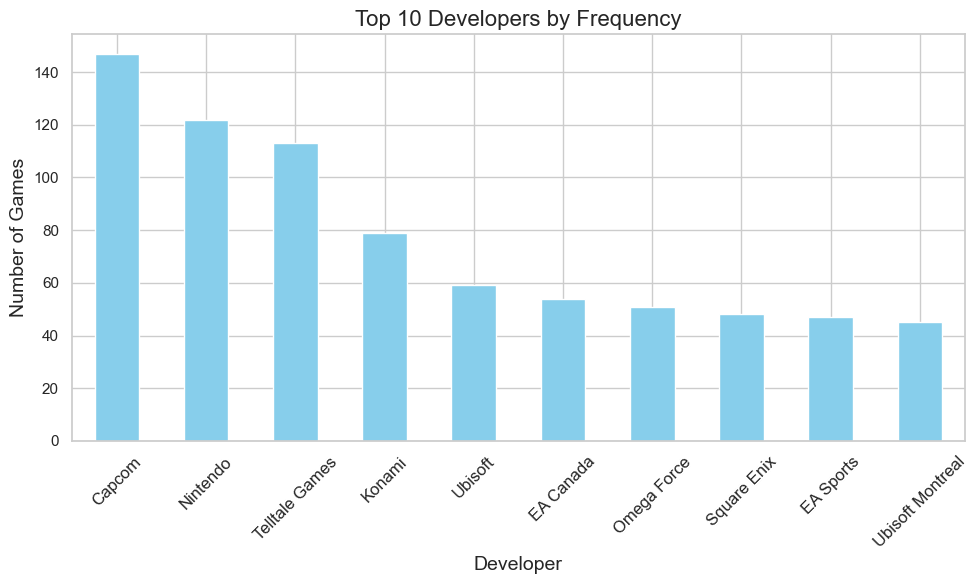

In [175]:
# Top 10 developers by frequency
top_developers = train_data['developer'].value_counts().head(10)

print("Top 10 Developers by Frequency:")
print(top_developers)

# Bar plot for visualization
top_developers.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Developers by Frequency", fontsize=16)
plt.xlabel("Developer", fontsize=14)
plt.ylabel("Number of Games", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

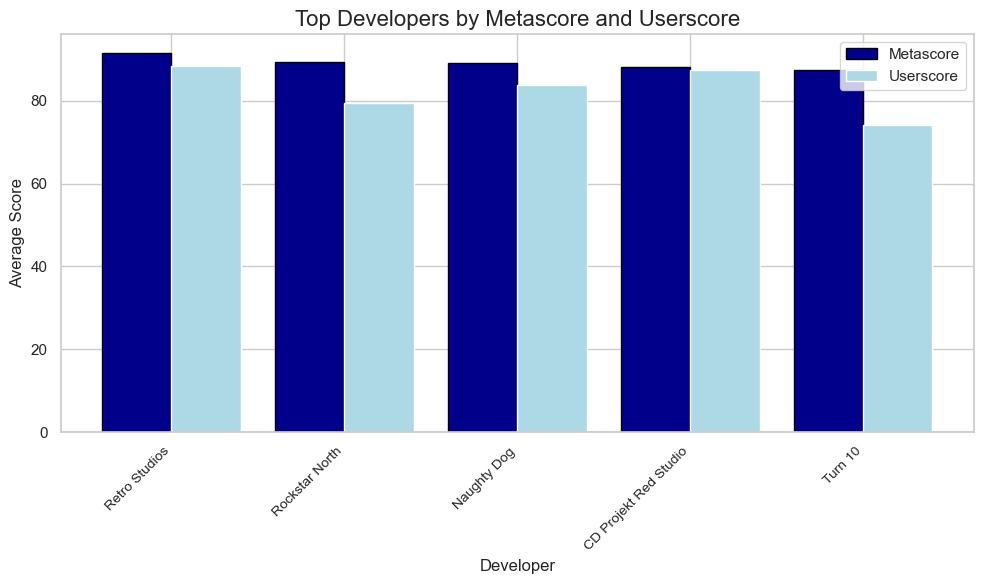

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter developers with at least 5 games
developer_counts = train_data['developer'].value_counts()
valid_developers = developer_counts[developer_counts >= 5].index
filtered_dataset = train_data[train_data['developer'].isin(valid_developers)]

# Compute top developers for metascore and userscore
top_developers = (
    filtered_dataset.groupby('developer')[['metascore', 'userscore']]
    .mean()
    .sort_values(by='metascore', ascending=False)
    .head(5)
)

# Create grouped bar chart
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(top_developers))
width = 0.4

ax.bar(x, top_developers['metascore'], width, label='Metascore', color='darkblue', edgecolor='black')
ax.bar([i + width for i in x], top_developers['userscore'], width, label='Userscore', color='lightblue', edgecolor='white')

ax.set_xticks([i + width / 2 for i in x])
ax.set_xticklabels(top_developers.index, rotation=45, ha='right', fontsize=10)
ax.set_title('Top Developers by Metascore and Userscore', fontsize=16)
ax.set_ylabel('Average Score', fontsize=12)
ax.set_xlabel('Developer', fontsize=12)
ax.legend()
plt.tight_layout()
plt.show()

2.10 Top Developers

In [177]:
# Prepare the data
top_developers = (
    filtered_dataset.groupby('developer')[['metascore', 'userscore']]
    .mean()
    .sort_values(by='metascore', ascending=False)
    .head(5)
)

# Display the table
print(top_developers)

                       metascore  userscore
developer                                  
Retro Studios          91.400000  88.400000
Rockstar North         89.206373  79.413073
Naughty Dog            89.153846  83.692308
CD Projekt Red Studio  88.035724  87.478254
Turn 10                87.381944  74.109141


2.11 Textual feature summary distribution and frequency analysis

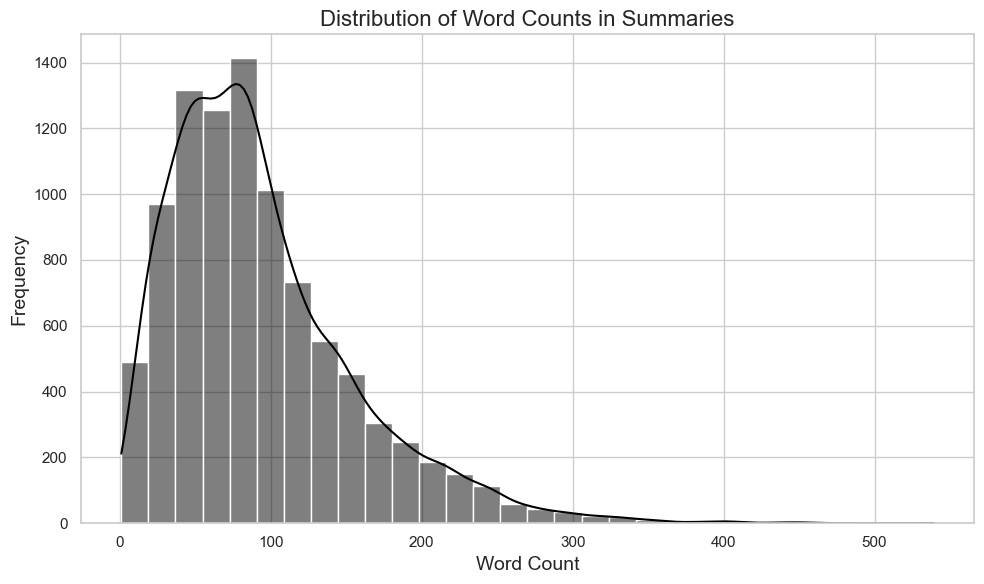

In [178]:
# Word count in summaries
train_data['summary_word_count'] = train_data['summary'].apply(lambda x: len(x.split()))

# Plot distribution of word counts
plt.figure(figsize=(10, 6))
sns.histplot(train_data['summary_word_count'], bins=30, color='black', kde=True)
plt.title("Distribution of Word Counts in Summaries", fontsize=16)
plt.xlabel("Word Count", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.tight_layout()
plt.show()

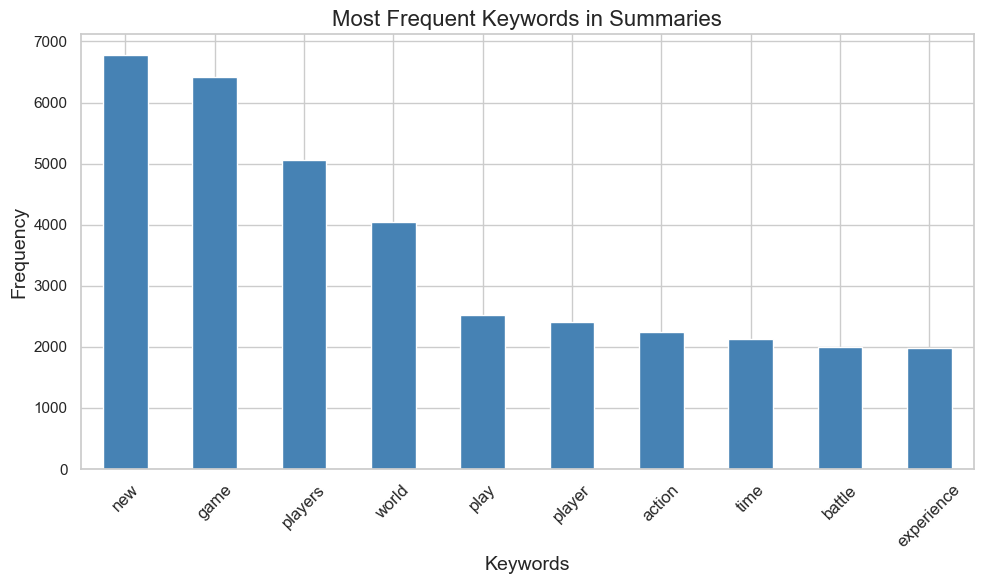

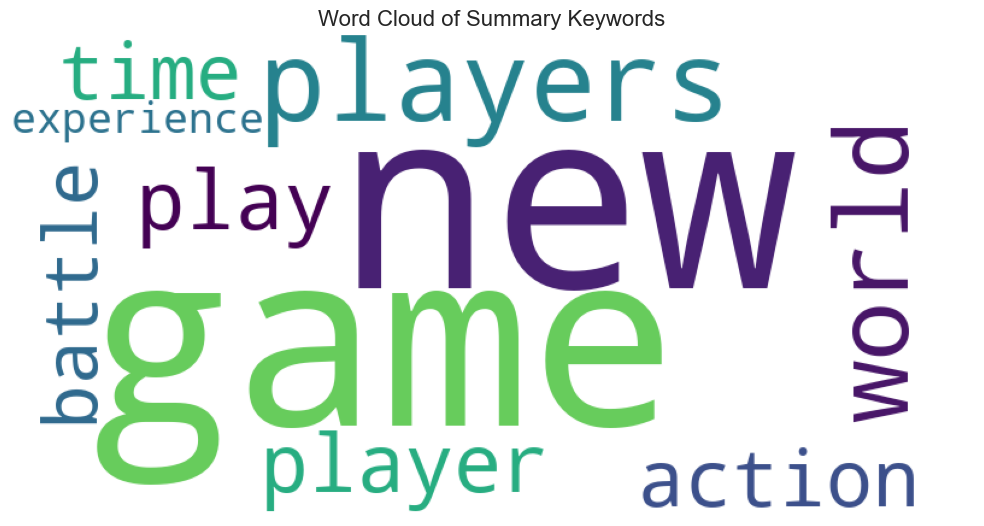

In [179]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

# Use CountVectorizer to extract most frequent words
vectorizer = CountVectorizer(stop_words='english', max_features=10)
word_counts = vectorizer.fit_transform(train_data['summary'])
word_freq = dict(zip(vectorizer.get_feature_names_out(), word_counts.sum(axis=0).A1))

# Bar chart of most frequent words
pd.Series(word_freq).sort_values(ascending=False).plot(kind='bar', figsize=(10, 6), color='steelblue')
plt.title("Most Frequent Keywords in Summaries", fontsize=16)
plt.xlabel("Keywords", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='kaiser')
plt.axis('off')
plt.title("Word Cloud of Summary Keywords", fontsize=16)
plt.tight_layout()
plt.show()

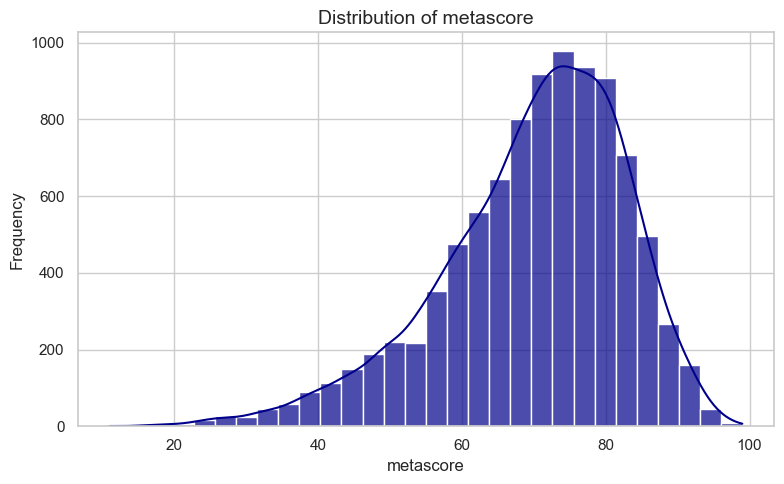

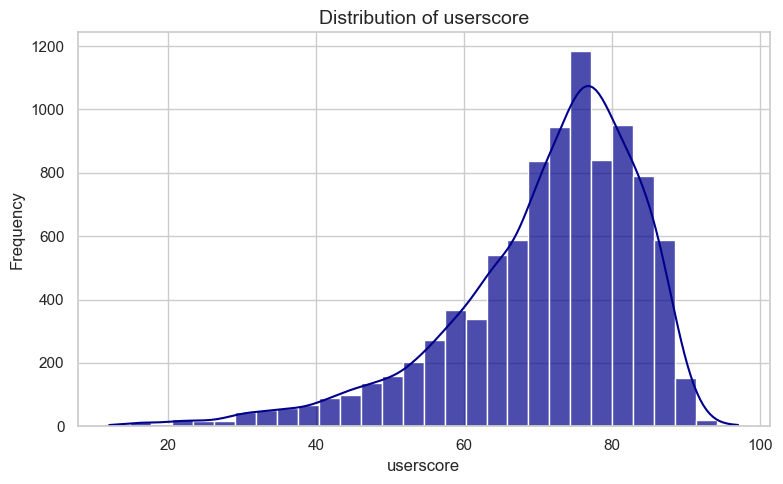

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style for academic plots
sns.set_theme(style="whitegrid", palette="Blues_r")

# 1. Target Variable Analysis
def analyze_target(data, target_cols):
    for target in target_cols:
        plt.figure(figsize=(8, 5))
        sns.histplot(data[target], kde=True, bins=30, color='darkblue', alpha=0.7)
        plt.title(f"Distribution of {target}", fontsize=14)
        plt.xlabel(target, fontsize=12)
        plt.ylabel("Frequency", fontsize=12)
        plt.tight_layout()
        plt.show()

# Call the function for metascore and userscore
analyze_target(train_data, ["metascore", "userscore"])

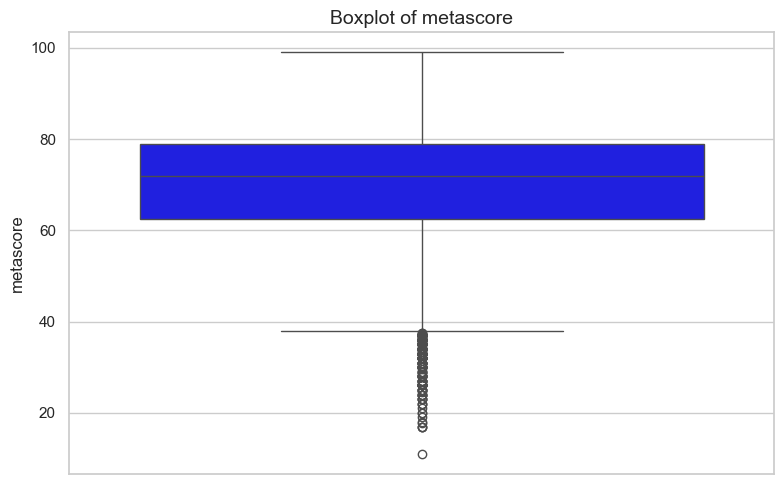

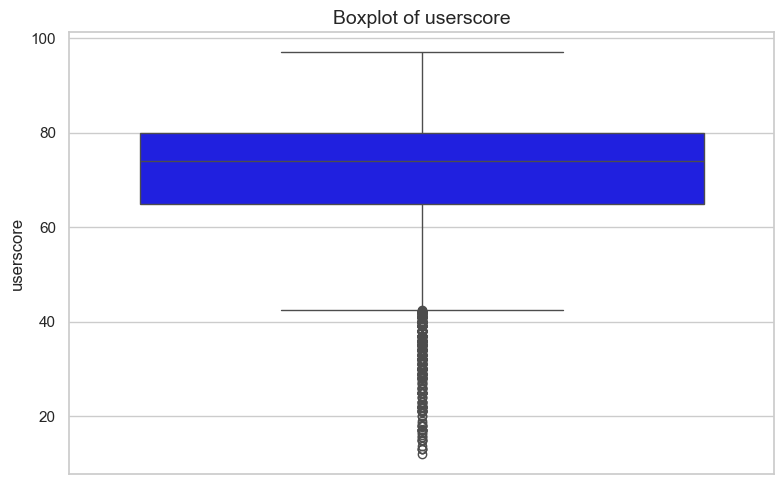

In [181]:

# 2. Numerical Feature Analysis
def numerical_feature_analysis(data, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, y=col, color='blue')
        plt.title(f"Boxplot of {col}", fontsize=14)
        plt.ylabel(col, fontsize=12)
        plt.tight_layout()
        plt.show()

# List of numerical features (excluding metascore/userscore)
numerical_features = ["metascore", "userscore"]  # Add more if applicable
numerical_feature_analysis(train_data, numerical_features)

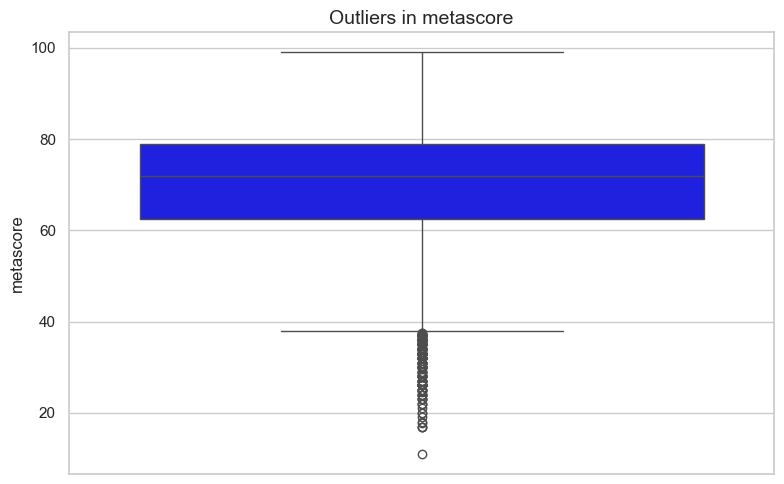

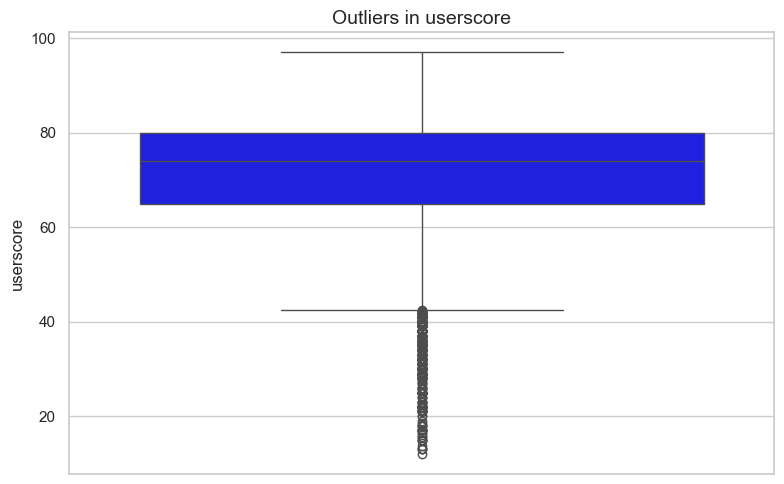

In [182]:
# 7. Outliers
def detect_outliers(data, numerical_cols):
    for col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=data, y=col, color='blue')
        plt.title(f"Outliers in {col}", fontsize=14)
        plt.ylabel(col, fontsize=12)
        plt.tight_layout()
        plt.show()

detect_outliers(train_data, numerical_features)

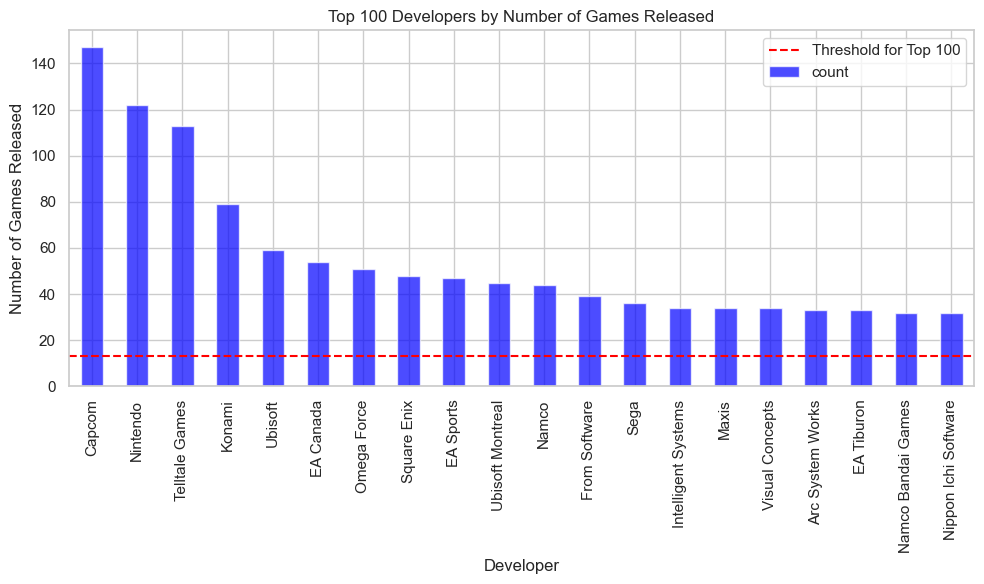

In [184]:
import matplotlib.pyplot as plt

# Plot the distribution of game releases by developers
plt.figure(figsize=(10, 6))
developer_counts.head(20).plot(kind='bar', color='blue', alpha=0.7)
plt.axhline(developer_counts.iloc[99], color='red', linestyle='--', label='Threshold for Top 100')
plt.title('Top 100 Developers by Number of Games Released')
plt.xlabel('Developer')
plt.ylabel('Number of Games Released')
plt.legend()
plt.tight_layout()
plt.show()

In [185]:
# Calculate cumulative percentage of games contributed by developers
developer_counts_cumsum = developer_counts.cumsum()
developer_counts_percentage = (developer_counts_cumsum / developer_counts.sum()) * 100

# Identify the percentage for the top 100 developers
threshold_percentage = developer_counts_percentage.iloc[99]
print(f"The top 100 developers account for {threshold_percentage:.2f}% of all games.")

The top 100 developers account for 29.16% of all games.


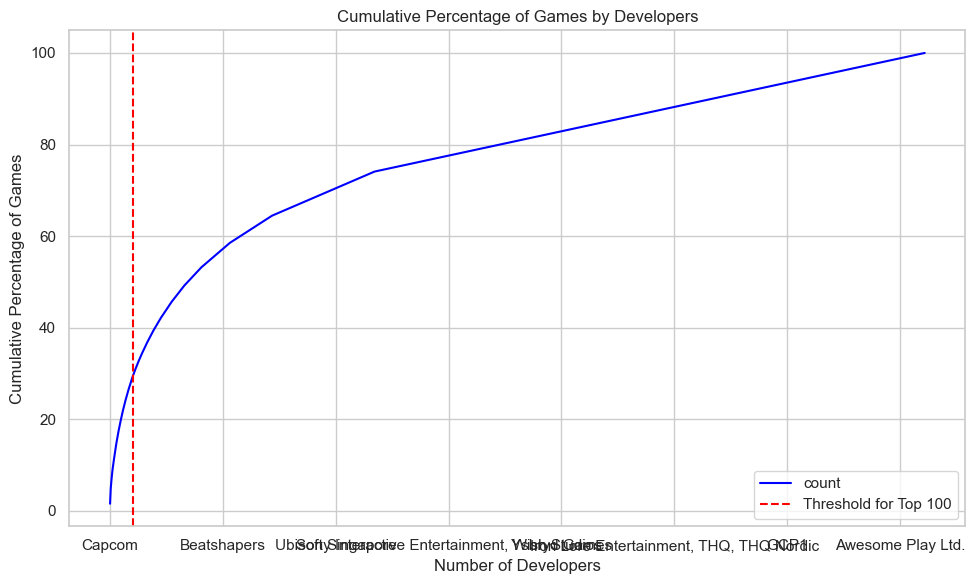

In [186]:
plt.figure(figsize=(10, 6))
developer_counts_percentage.plot(kind='line', color='blue')
plt.axvline(100, color='red', linestyle='--', label='Threshold for Top 100')
plt.title('Cumulative Percentage of Games by Developers')
plt.xlabel('Number of Developers')
plt.ylabel('Cumulative Percentage of Games')
plt.legend()
plt.tight_layout()
plt.show()

In [187]:
# Calculate statistical measures
mean_games = developer_counts.mean()
median_games = developer_counts.median()
percentile_90 = developer_counts.quantile(0.9)

print(f"Mean games per developer: {mean_games}")
print(f"Median games per developer: {median_games}")
print(f"90th percentile: {percentile_90}")

# Compare the number of games released by the 100th developer
print(f"Games released by 100th developer: {developer_counts.iloc[99]}")

Mean games per developer: 2.6062032677928553
Median games per developer: 1.0
90th percentile: 5.0
Games released by 100th developer: 13
